# Mistral OCR

In [3]:
import base64
from io import BytesIO
from IPython.display import Markdown, display # pip install ipython
import json
import keyring # pip install keyring
from markitdown import MarkItDown # pip install markitdown
from mistralai import Mistral # pip install mistralai
from PIL import Image, ImageDraw # pip install pillow
import requests # pip install requests

In [4]:
client = Mistral(api_key=keyring.get_password('Mistral_API_key', 'Medium_API_test'))

## OCR with PDF
- See also: https://docs.mistral.ai/capabilities/document/#ocr-with-pdf

**PDF from the web**

In [5]:
ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": "https://admin.stat.gov.lv/system/files/publication/2025-01/Nr_14_Paterina_cenas_2024_04_%282024_04q%29_LV_EN.pdf"
    },
    include_image_base64=True
)

In [6]:
# Number of pages in the pdf document
len(ocr_response.pages)

8

In [14]:
for page in ocr_response.pages:
    print(page.markdown[:100])

![img-0.jpeg](img-0.jpeg)

# PATËRINA CENAS CONSUMER PRICES 

Šajā izdevumā ir publicētas svērtās ar
# PATĖRINA CENU PÄRMAINAS CONSUMER PRICE CHANGES 

(\% pret iepriekšējā gada attiecīgo mēnesi/
as \%
| Nosaukums un mẽrvieníba | X | XI | XII | Commodity, unit of measurement |
| :--: | :--: | :--: | :
| Nosaukums un mērvienība | X | XI | XII | Commodity, unit of measurement |
| :--: | :--: | :--: | :
| Nosaukums un mẽrvieníba | X | XI | XII | Commodity, unit of measurement |
| :--: | :--: | :--: | :
| Nosaukums un mẽrvieníba | X | XI | XII | Commodity, unit of measurement |
| :--: | :--: | :--: | :
# PAKALPOJUMU UN NEPĀRTIKAS PREČU VIDĖJĀS CENAS 2024. GADA IV CETURKŠNA MĖNEŠOS <br> AVERAGE PRICES 
![img-3.jpeg](img-3.jpeg)
(C) Centrālā statistikas pārvalde, 2025.

Central Statistical Bureau of La


In [ ]:
markdowns: list[str] = []

# Extract images from page
for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
        image_data[img.id] = img.image_base64
    # Replace image placeholders in markdown with base64-encoded images
    for img_name, base64_str in image_data.items():
        page.markdown = page.markdown.replace(
            f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})"
            )
    # Combine OCR text and images into a single markdown document
    markdowns.append(page.markdown)

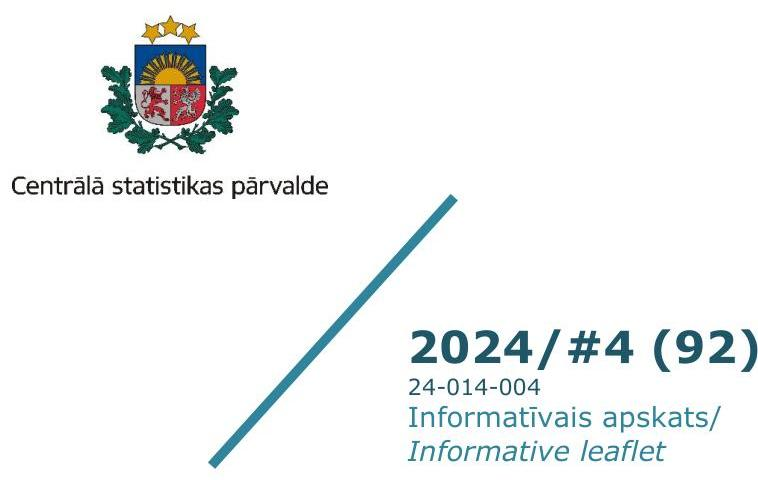

# PATËRINA CENAS CONSUMER PRICES 

Šajā izdevumā ir publicētas svērtās aritmētiskās vidējās cenas patēriņa precēm (galvenokārt uztura produktiem un atsevišķiem pakalpojumiem), kas viegli sagrupējamas un aprakstāmas pēc kopīgām pazīmēm. Cenas netiek publicētas precēm, kam ir plašs piedāvātais sortiments, piemēram, apḡērbam, apaviem, elektronikas precēm u.tml.

Galvenais cenu reḡistrācijas mērķis ir cenu pārmaiņu novērtēšana noteiktā laika periodā, lai aprēķinātu patēriņa cenu indeksu (PCI).

Cenu un tarifu reḡistrācija notiek katru mēnesi no 4. līdz 20. datumam Rīgā un 10 citās Latvijas pilsētās. Pavisam 538 precēm un pakalpojumiem tiek reḡistrēts aptuveni 24,5 tūkst. cenu un tarifu. Mēnesī 146 pārtikas precēm tiek savākts apmēram 7,8 tūkst. cenu, kas ir $32 \%$ no kopējā cenu skaita.

Cenām sezonas korekcijas netiek veiktas. Vidējās cenas valsts mērogā tiek rēkinātas, lietojot attiecīgā cenu vākšanas reḡiona iedzīvotāju skaita īpatsvaru.

Cenu reḡistrācijā tiek ņemtas vērā arī cenu atlaides kvalitatīvām precēm, kas tiek piedāvātas visiem pircējiem.

Norādītās cenas var arī nereprezentēt valsts vidējās cenas. Tās atspogujo indikatīvu cenu līmeni produktiem noteiktas specifikācijas ietvaros, kurus parasti pērk pircēji visā valstī un no kuriem tādējādi tiek rēkināts PCI Latvijā.

This publication gives weighted arithmetic mean prices of consumer goods (primarily food products and selected services) which can be easily grouped and described by common features. The prices of goods with a wide assortment for sale, such as clothing, footwear, electronic goods, etc., are not published.

The main purpose of collecting the prices is the evaluation of price changes over a defined period of time with the aim to calculate consumer price index (CPI).

The prices and tariffs are observed in Riga and 10 other towns every month, from 4th to 20th date. In total about 24.5 thsd prices of 538 goods and services are registered. Approximately 7.8 thsd prices of 146 food products are recorded monthly, representing $32 \%$ of the total number of prices.

The prices are not seasonally adjusted. The average prices in the country are calculated using the population "weights" of the respective price collection region.

Qualitative goods with price discounts offered to all buyers are also taken into account in price collection.

The prices published do not necessarily represent the national average prices. They show indicative price levels within the scope of the definitions used, for specific products that consumers usually buy nationally and that are therefore used to calculate the national CPI.

# PATĖRINA CENU PÄRMAINAS CONSUMER PRICE CHANGES 

(\% pret iepriekšējā gada attiecīgo mēnesi/
as \%, compared to the corresponding month of the previous year)
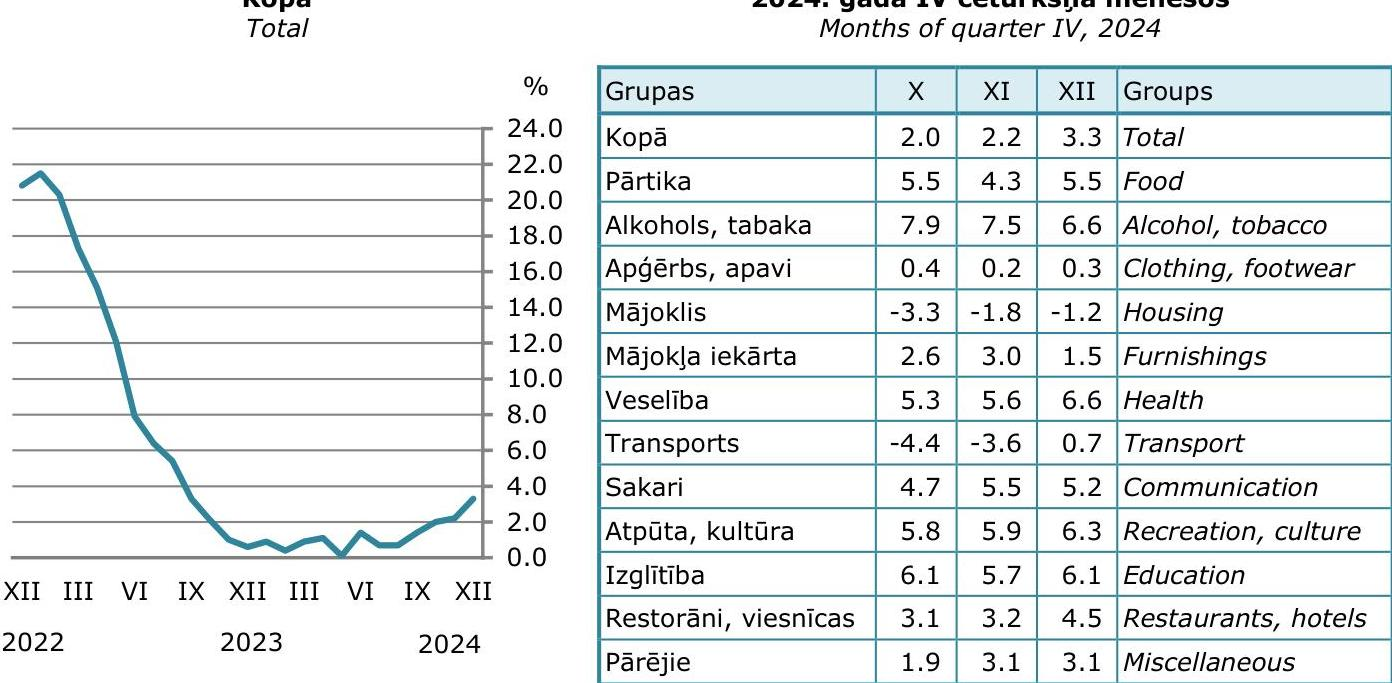

PÄRTIKAS PREČU UN ALKOHOLISKO DZĒRIENU VIDĖJĀS CENAS 2024. GADA IV CETURKŠNA MĒNEŠOS

AVERAGE PRICES OF FOOD PRODUCTS AND ALCOHOLIC BEVERAGES BY MONTH OF QUARTER IV, 2024
(eiro par 1 kg , ja citādāk - norādīts īpaši/ euros per 1 kg , if not specified otherwise)

| Nosaukums un mērvienība | X | XI | XII | Commodity, unit of measurement |
| :--: | :--: | :--: | :--: | :--: |
| MAIZE UN GRAUDAUGI |  |  |  | BREAD AND CEREALS |
| Rīsi | 2.69 | 2.69 | 2.64 | Rice |
| Kviešu milti | 1.19 | 1.20 | 1.18 | Wheat flour |
| Grikj̄ | 3.14 | 3.17 | 3.24 | Buckwheat |
| Auzu pārslas | 2.73 | 2.76 | 2.66 | Flaked oats |
| Manna | 1.82 | 1.80 | 1.77 | Semolina |
| Miežu putraimi | 1.47 | 1.46 | 1.41 | Barley groats |
| Rudzu-kviešu maize | 1.95 | 1.87 | 1.86 | Rye-wheat bread |
| Graudu maize | 3.56 | 3.62 | 3.55 | Grain bread |
| Baltmaize | 3.16 | 3.12 | 3.10 | Wheat bread |
| Tostermaize | 3.11 | 3.04 | 3.09 | Toaster bread |
| Saldskābmaize | 3.22 | 3.21 | 3.22 | Fine rye bread |
| Rudzu maize | 2.88 | 2.84 | 3.00 | Rye bread |
| Torte | 12.66 | 12.80 | 13.00 | Cake |
| Makaroni, 500 g | 1.52 | 1.53 | 1.52 | Pasta, 500 g |
| Kukurūzas pārslas, 250 g | 2.59 | 2.53 | 2.51 | Cornflakes, 250 g |

| Nosaukums un mẽrvieníba | X | XI | XII | Commodity, unit of measurement |
| :--: | :--: | :--: | :--: | :--: |
| GAŁA UN GAŁAS IZSTRÃDÃJUMI |  |  |  | MEAT AND MEAT PRODUCTS |
| Liellopu gaia ar kaulu | 8.70 | 8.70 | 8.99 | Beef with bone |
| Cũkgaja ar kaulu | 6.17 | 6.20 | 6.12 | Pork with bone |
| Cũkgaja bez kaula | 6.65 | 6.58 | 6.71 | Pork without bone |
| Vista (cãlis) | 3.63 | 3.68 | 3.73 | Chicken |
| Vistas fileja | 6.95 | 6.90 | 6.91 | Chicken fillet |
| Vistu stilbi | 3.49 | 3.59 | 3.45 | Chicken legs |
| Vãritã desa | 9.01 | 8.80 | 8.60 | Boiled sausage |
| Cĩsiņi | 8.10 | 8.02 | 7.67 | Sausages, small |
| Pusžãvẽtã desa | 9.26 | 9.26 | 8.89 | Sausage, smoked |
| Cieti žãvẽtã desa | 13.32 | 13.46 | 13.59 | Sausage, cold smoked |
| Žãvẽta vai kũpinãta cũkgaja | 9.81 | 9.87 | 10.02 | Dried or smoked pork |
| Marinẽta gaia | 8.86 | 9.13 | 8.86 | Marinated meat |
| Pelmeņi | 5.46 | 5.50 | 5.54 | Meat dumplings |
| Žãvẽta vista | 8.91 | 8.68 | 8.76 | Smoked chicken |
| Maltã gaia | 6.00 | 5.85 | 6.25 | Minced meat |
| Sautẽtas gaias konservi, 250 g | 2.08 | 2.10 | 2.04 | Canned stewed meat, 250 g |
| ZIVIS UN JŨRAS VELTES |  |  |  | FISH AND SEAFOOD |
| Svaiga vai atdzesẽta karpa | 8.16 | 7.72 | 7.27 | Carp, fresh or chilled |
| Atdzesẽts lasis | 10.75 | 10.26 | 10.34 | Salmon, chilled |
| Zivju fileja, saldẽta | 13.16 | 13.29 | 13.29 | Frozen fish fillet |
| Saldẽtas garneles, 500 g | 13.91 | 14.33 | 14.17 | Shrimp, frozen, 500 g |
| Kũpinãta skumbrija | 10.31 | 10.47 | 10.70 | Mackerel, smoked |
| Siļ̣u titeņi | 7.71 | 7.52 | 7.76 | Herring rolls |
| Šprotes eļ̧ã, 240 g | 2.85 | 2.88 | 2.97 | Sprats in oil, 240 g |
| PIENS, SIERS UN OLAS |  |  |  | MILK, CHEESE AND EGGS |
| Piens, 1 I | 1.17 | 1.17 | 1.20 | Milk, 1 I |
| Jogurts | 3.15 | 3.18 | 3.24 | Yoghurt |
| Biezpiens | 6.16 | 6.19 | 6.41 | Curd |
| Siers | 12.23 | 11.96 | 12.23 | Cheese |
| Kausẽtais siers, 200 g | 2.08 | 2.05 | 2.05 | Processed cheese, 200 g |
| Skãbais krẽjums | 4.98 | 5.06 | 4.95 | Sour cream |
| Saldais krẽjums 35\% | 7.42 | 7.78 | 7.75 | Cream 35\% |
| Kefirs | 1.34 | 1.35 | 1.40 | Kefir |
| Saldais biezipiena sieriņ̃, 50 g | 0.50 | 0.50 | 0.48 | Sweet curd snack, 50 g |
| Olas, 10 gab. | 2.48 | 2.52 | 2.62 | Eggs, 10 pcs |

| Nosaukums un mērvienība | X | XI | XII | Commodity, unit of measurement |
| :--: | :--: | :--: | :--: | :--: |
| ELLAA UN TAUKVIELAS |  |  |  | OILS AND FATS |
| Sviests | 13.50 | 14.23 | 15.09 | Butter |
| Margarīns | 4.51 | 4.46 | 4.47 | Margarine |
| Olīveljja, 1 I | 21.39 | 21.05 | 21.42 | Olive oil, 1 I |
| Augu elja, 1 I | 3.19 | 3.11 | 3.32 | Vegetable oil, 1 I |
| AUGLI |  |  |  | FRUIT |
| Āboli | 1.51 | 1.53 | 1.60 | Apples |
| Bumbieri | 1.87 | 1.89 | 1.97 | Pears |
| Banāni | 1.52 | 1.40 | 1.52 | Bananas |
| Apelsīni | 2.39 | 2.27 | 2.20 | Oranges |
| Citroni | 2.84 | 2.30 | 2.43 | Lemons |
| Vīnogas | 4.35 | 5.29 | 6.16 | Grapes |
| Avokado, 1 gab. | 0.91 | 0.92 | 0.95 | Avocados, 1 piece |
| Mellenes | 18.94 | 18.17 | 14.53 | Blueberries |
| Melones | 2.27 | 2.20 | 2.17 | Melons |
| Kivi | 4.41 | 3.50 | 3.36 | Kiwi fruit |
| Rozīnes | 7.31 | 7.60 | 7.43 | Raisins |
| Zemesrieksti | 5.04 | 5.08 | 5.06 | Peanuts |
| Konservēti augji | 3.50 | 3.42 | 3.49 | Canned fruit |
| DĀRZEŇI |  |  |  | VEGETABLES |
| Burkāni | 0.93 | 0.97 | 1.01 | Carrots |
| Tomāti | 2.96 | 3.30 | 3.04 | Tomatoes |
| Kāposti | 0.89 | 0.91 | 0.89 | Cabbages |
| Sīpoli | 0.89 | 0.86 | 0.92 | Onions |
| Gurki | 3.32 | 3.37 | 3.20 | Cucumbers |
| Paprika | 3.09 | 3.30 | 3.38 | Sweet pepper |
| Sīpolu lociņi | 13.20 | 13.53 | 13.81 | Spring onions |
| Ḳinas kāposti (salāti) | 1.89 | 1.75 | 1.68 | Chinese cabbages |
| Dilles | 24.64 | 24.68 | 24.67 | Dill |
| Kiploki | 6.21 | 6.22 | 6.23 | Garlic |
| Kabači/cukini | 3.13 | 3.15 | 3.03 | Squash/zucchini |
| Ḳirbji | 1.43 | 1.49 | 1.43 | Pumpkins |
| Saldēti dārzeņi | 3.55 | 3.56 | 3.52 | Frozen vegetables |
| Kaltētas pupinas | 3.64 | 3.58 | 3.60 | Dried beans |

| Nosaukums un mẽrvieníba | X | XI | XII | Commodity, unit of measurement |
| :--: | :--: | :--: | :--: | :--: |
| Konservẽti zajie zimíši, 500 g | 1.80 | 1.80 | 1.84 | Canned green peas, 500 g |
| Konservẽta saldã kukurũza, 500 g | 2.19 | 2.26 | 2.23 | Canned sweet corn, 500 g |
| Konservẽti marinẽtie gurki | 3.23 | 3.26 | 3.27 | Canned pickled cucumbers |
| Marinẽtas bietes | 3.54 | 3.62 | 3.49 | Pickled beetroots |
| Kartupeji | 0.72 | 0.74 | 0.74 | Potatoes |
| Saldẽti frí kartupeji | 4.02 | 3.99 | 3.85 | Frozen fries |
| Čipsi, 75 g | 1.24 | 1.20 | 1.25 | Crisps, 75 g |
| CUKURS UN SALDUMI |  |  |  | SUGAR AND SWEETS |
| Smalkais cukurs | 1.08 | 1.04 | 1.01 | Sugar |
| Ievãrĩjums | 9.54 | 9.48 | 9.33 | Jam |
| Medus | 11.32 | 11.49 | 11.28 | Honey |
| Šokolãdes konfektes | 17.85 | 17.14 | 17.61 | Chocolate candies |
| Šokolãdes batoniņš, 60 g | 1.18 | 1.22 | 1.20 | Chocolate bar, 60 g |
| Šokolãdes tãfelĩte (kakao saturs > 50\%), 100 g | 2.46 | 2.51 | 2.51 | Chocolate bar (>50\% cocoa), 100 g |
| Saldẽjums, lielais iepakojums, 1000 ml | 5.36 | 5.19 | 5.47 | Ice cream, large package, 1000 ml |
| Saldẽjums, mazais iepakojums, 1000 ml | 11.33 | 10.98 | 11.03 | Ice cream, small package, 1000 ml |
| CITI PÃRTIKAS PRODUKTI |  |  |  | OTHER FOOD PRODUCTS |
| Tomãtu mẽrce | 4.76 | 4.76 | 4.73 | Tomato sauce |
| Sinepes | 7.32 | 7.32 | 7.42 | Mustard |
| Majonẽze | 5.27 | 5.28 | 5.37 | Mayonnaise |
| Rupjã maluma sãls | 1.21 | 1.22 | 1.21 | Coarse salt |
| Garšvielu maisijums, 250 g | 2.33 | 2.38 | 2.38 | Mixed seasonings, 250 g |
| BEZALKOHOLISKIE DZÕRIENI |  |  |  | NON-ALCOHOLIC BEVERAGES |
| Maltã kafija | 18.29 | 18.73 | 20.73 | Ground coffee |
| Škĩstošã kafija, 100 g | 4.91 | 4.57 | 5.13 | Instant coffee, 100 g |
| Melnã tẽja | 25.58 | 25.18 | 26.16 | Black tea |
| Tẽja porciju maisinos, 50 g | 2.73 | 2.52 | 2.63 | Tea bags, 50 g |
| Minerãlūdens, 1,5 I | 0.73 | 0.74 | 0.74 | Mineral water, 1.5 I |
| Negãzẽts minerãlūdens, 1,5 I | 0.71 | 0.73 | 0.72 | Still mineral water, 1.5 I |
| Gãzẽtie dzẽrieni, 1 I | 1.44 | 1.36 | 1.49 | Carbonated soft drinks, 1 I |
| Kvass, 1 I | 1.20 | 1.21 | 1.21 | Kvass, 1 I |
| Augju un dãrzeŋu sulas, 1 I | 1.98 | 1.96 | 1.95 | Fruit and vegetable juices, 1 I |

| Nosaukums un mẽrvieníba | X | XI | XII | Commodity, unit of measurement |
| :--: | :--: | :--: | :--: | :--: |
| ALKOHOLÍSKIE DZËRIENI UN TABAKAS IZSTRÁDÁJUMI |  |  |  | ALCOHOLIC BEVERAGES AND TOBACCO PRODUCTS |
| Degvĩns, 1 I | 18.09 | 18.14 | 17.74 | Vodka, 1 I |
| Brendijs, 1 I | 20.84 | 20.72 | 20.02 | Brandy, 1 I |
| Rigas melnais balzams, 1 I | 26.80 | 25.81 | 26.85 | Riga black balsam, 1 I |
| Viskijs, 1 I | 27.12 | 27.39 | 26.17 | Whiskey, 1 I |
| Alkoholiskais kokteilis, 1 I | 6.56 | 6.61 | 6.64 | Alcoholic cocktail, 1 I |
| Vĩns, 1 I | 10.41 | 10.95 | 10.94 | Wine, 1 I |
| Dzirkstošais vĩns, 0,75 I | 6.29 | 6.36 | 6.34 | Sparkling wine, 0.75 I |
| Alus, 4,0-5,5 \%, 1 I | 2.96 | 2.90 | 2.95 | Beer, 4.0-5.5 \%, 1 I |
| Cigaretes, 20 gab. | 4.93 | 4.93 | 4.93 | Cigarettes, 20 pieces |

# ATSEVIŠKU PREČU CENU DINAMIKA 

DYNAMICS OF SELECTED PRODUCT PRICES
(eiro/ euros)
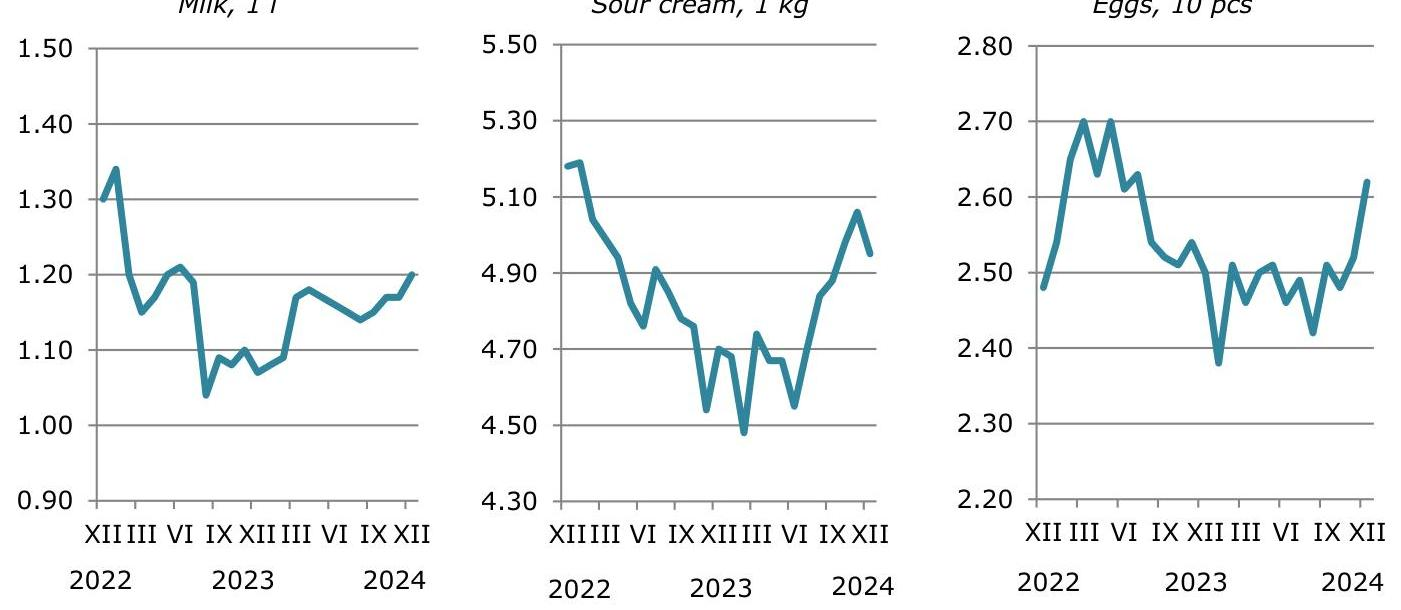

# PAKALPOJUMU UN NEPĀRTIKAS PREČU VIDĖJĀS CENAS 2024. GADA IV CETURKŠNA MĖNEŠOS <br> AVERAGE PRICES OF SERVICES AND NON-FOOD PRODUCTS BY MONTH OF QUARTER IV, 2024 

(eiro/ euros)

| Nosaukums un mērvienība | X | XI | XII | Commodity, unit of measurement |
| :--: | :--: | :--: | :--: | :--: |
| Ḳīmiskā tīrīšana (vīriešu uzvalka) | 17.46 | 17.46 | 17.50 | Dry cleaning (men's suit) |
| Ūdensapgāde, $10 \mathrm{~m}^{3}$ | 13.56 | 13.56 | 13.75 | Water supply, $10 \mathrm{~m}^{3}$ |
| Atkritumu savākšana, $1 \mathrm{~m}^{3}$ | 31.07 | 31.07 | 31.07 | Refuse collection, $1 \mathrm{~m}^{3}$ |
| Kanalizācijas pakalpojumi, $10 \mathrm{~m}^{3}$ | 15.07 | 15.07 | 15.40 | Sewage collection, $10 \mathrm{~m}^{3}$ |
| Saškidrinātā gāze balonos, 50 I | 36.35 | 36.52 | 36.59 | Liquefied gas in cylinders, 50 I |
| Siltumenerǵija, 1 MWh | 83.57 | 83.10 | 82.69 | Heat energy, 1 MWh |
| Dīzeļdegviela, 10 I | 14.84 | 14.68 | 15.15 | Diesel, 10 I |
| Benzīns 95, 10 I | 15.11 | 15.23 | 15.60 | Petrol 95, 10 I |
| Benzīns 98, 10 I | 15.59 | 15.75 | 16.10 | Petrol 98, 10 I |
| Auto gāze, 10 I | 7.73 | 7.85 | 8.06 | Auto gas, 10 I |
| Autovadītāju kursi: praktiskā nodarbība, 1 h | 23.42 | 23.51 | 23.86 | Driving courses: practical lessons, 1 h |
| Bijetes cena tramvajā | 1.37 | 1.37 | 1.37 | Tram fare |
| Bijetes cena pilsētas autobusā | 1.14 | 1.14 | 1.14 | Urban bus fare |
| Taksometra tarifs, 5 km | 7.79 | 7.87 | 7.87 | Taxi fare, 5 km |
| Vēstules nosūtīšana valsts robežās | 1.65 | 1.65 | 1.65 | Postage of a letter, domestic |
| Peldbaseina apmeklējums, 1 nodarbība | 10.13 | 10.13 | 10.13 | Swimming pool, 1 visit |
| Kino bijete | 8.05 | 8.12 | 8.33 | Cinema ticket |
| Alus kauss (0,5 I) bārā vai restorānā | 4.29 | 4.29 | 4.29 | Glass of beer (0.5 I) in bar or restaurant |
| Tase kafijas kafejnīcā vai restorānā | 2.28 | 2.28 | 2.29 | Cup of coffee in café or restaurant |
| Vīriešu matu griešana | 18.29 | 18.44 | 18.44 | Men's haircut |
| Sieviešu matu griešana un veidošana | 28.73 | 28.87 | 29.07 | Women's haircut |

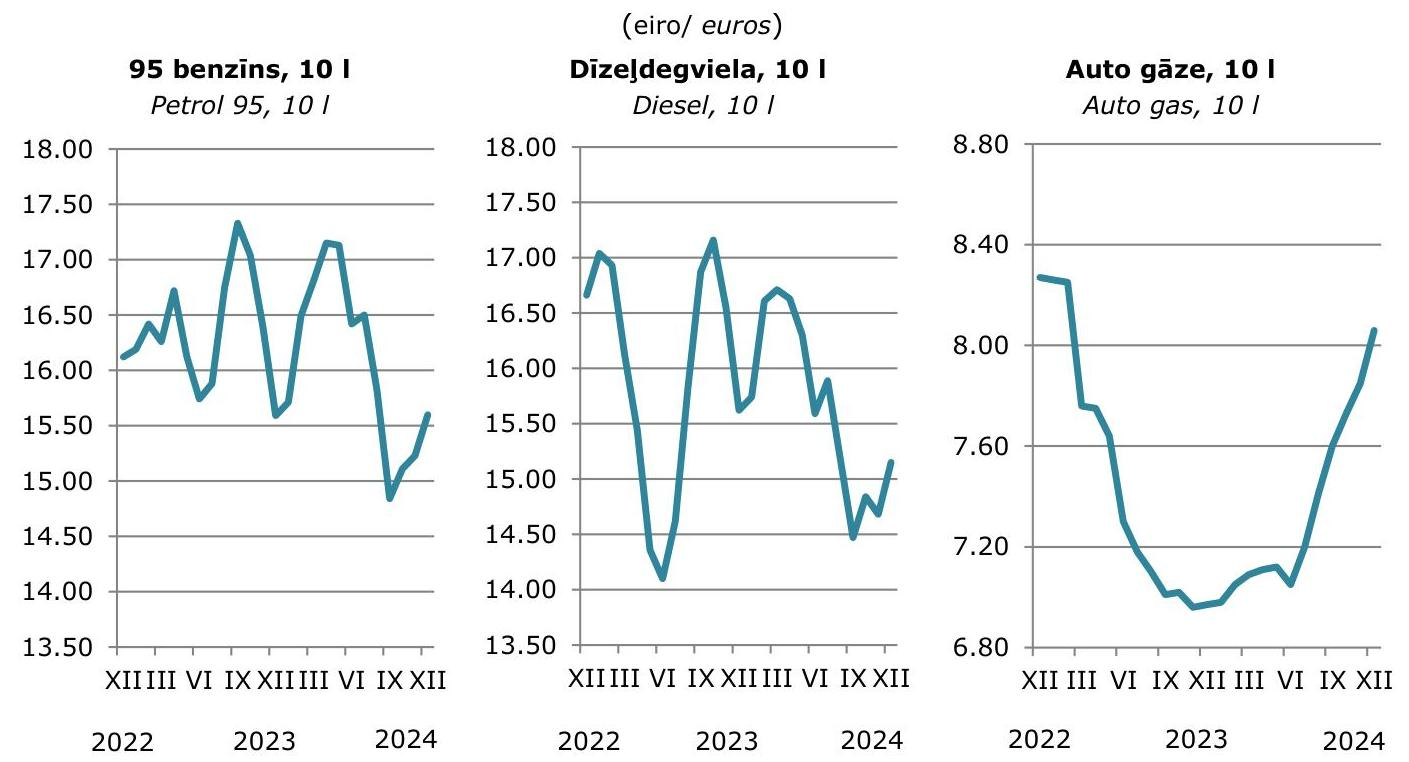
(C) Centrālā statistikas pārvalde, 2025.

Central Statistical Bureau of Latvia, 2025.
Pārpublicēšanas un citēšanas gadījumā atsauce obligāta. Reproductions and quotations are permitted on condition that the source is stated.

Lāčplēša iela 1, Rīga, LV-1010
tāirunis: +371 67366922; info@csp.gov.lv; www.csp.gov.lv; https://stat.gov.lv
Lāčplēša iela 1, Riga, LV-1010
phone: +371 67366922; info@csp.gov.lv; www.csp.gov.lv/en; https://stat.gov.lv/en

In [10]:
display(Markdown("\n\n".join(markdowns)))

**PDF from the local directory**
- You need to upload a PDF file and then get the OCR results from the uploaded PDF.
- Original PDF source from [data.gov.lv](https://data.gov.lv/dati/lv/dataset/dzives-kvalitate-pilsetas/resource/3624121d-3763-46a8-97f7-1eb90f18b718).

In [15]:
# Upload a file
    # Uploaded file will be shown also in https://console.mistral.ai/build/datasets
uploaded_pdf = client.files.upload(
    file={
        "file_name": "anketa.pdf",
        "content": open("anketa.pdf", "rb"),
    },
    purpose="ocr"
) 

In [16]:
uploaded_pdf.id

'dd8bd7d9-ce55-4026-9e8a-53893457acc2'

In [17]:
# Get signed URL
signed_url = client.files.get_signed_url(file_id=uploaded_pdf.id)

In [18]:
ocr_response_pdf = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": signed_url.url,
    }
)

In [19]:
# Number of pages
len(ocr_response_pdf.pages)

6

In [39]:
markdowns_pdf: list[str] = []

# Extract images from page
for page in ocr_response_pdf.pages:
    image_data = {}
    for img in page.images:
        image_data[img.id] = img.image_base64
    # Replace image placeholders in markdown with base64-encoded images
    for img_name, base64_str in image_data.items():
        page.markdown = page.markdown.replace(
            f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})"
            )
    # Combine OCR text and images into a single markdown document
    markdowns_pdf.append(page.markdown)

In [40]:
display(Markdown("\n\n".join(markdowns_pdf)))

# CENTRĀLĀ STATISTIKAS PĀRVALDE 

Lāčplēša iela 1, Rīga, LV-1301, fakss: 67366658, www.csb.gov.lv

## DZĪVES KVALITĀTE PILSĒTĀS <br> 1-dzīves kvalitāte

13.12.2016. Nr.215-IM/2016

VSPARK 10711001

## B. sadaḷa. Dzīvesvietas adrese

| B1. | Lūdzu, norādiet, kurā pilsētā Jūs dzīvojat? |  |
| :--: | :--: | :--: |
| 1 | Daugavpilī |  |
| 2 | Jelgavā |  |
| 3 | Jēkabpilī |  |
| 4 | Jūrmalā |  |
| 5 | Liepājā |  |
| 6 | Rēzeknē |  |
| 7 | Valmierā |  |
| 8 | Ventspilī |  |
| 99 | Citā pilsētā | => anketas beigas |
| B2 | Lūdzu, norādiet dzīvesvietas adresi! |  |
| Adr | Izvēlas adresi no VARIS, tikai [B1] izvēlētā pilsētā |  |
|  | Pārbaude: VARIS kods ir starp apsekojamo adrešu kodiem | $=>$ C3 |
|  | Paskaidrojums zem jautājuma: <br> Lai norādītu savu adresi spiediet uz lupas ekrāna labajā pusē. |  |
| B3 | Lūdzu ievadiet vēstulē norādīto adreses kodu |  |
|  | Adreses kods, teksta lauks |  |
|  | Paskaidrojums zem jautājuma: <br> Jūs tikko norādījāt atšķirīgu adresi no tā̄s uz kuru mēs sūtījām vēstuli. Lūdzu, ierakstiet CSP vēstulē norādīto adreses kodu, lai mēs netraucētu vēstulē minētās adreses iedzīvotājus, veicot klā tienes vai telefoninterviju. <br> Adreses kods ir norādīts uz vēstules lapas otrās puses blakus adresei. Tajā ir iekḷauti pilsētas, kurā Jūs dzīvojat, nosaukuma pirmie 3 burti un 5 simboli. Piemēram JEL1234R. |  |

## C. sadaḷa: Izglītība

| C3. | Kāds ir Jūsu augstākais sekmīgi iegūtais izglītības līmenis? (Atzīmējiet vienu atbildi) |  |
| :--: | :-- | :-- |
| 1 | Doktora grāds |  |
| 2 | Augstākā izglītība (pirmā līmeņa profesionālā augstākā izglītība, akadēmiskā izglītība <br> (bakalaura/mağistra grāds) vai profesionālā bakalaura/mağistra grāds, vai otrā līmeņa profesionālā <br> augstākā izglītība) |  |
| 3 | Profesionālā vidējā izglītība pēc vispārējās vidējās izglītības |  |
| 4 | Arodizglītība vai profesionālā vidējā izglītība pēc pamatizglītības |  |
| 5 | Vispārējā vidējā izglītība pēc pamatizglītības vai arodizglītības |  |
| 6 | Pamatizglītība vai profesionālā pamatizglītība |  |
| 7 | Sākumskolas izglītība |  |
| 8 | Nav skolas izglītības vai zemāka par sākumskolas izglītību | $=>$ C5 |

| C4. | Kurā gadā Jūs sekmīgi ieguvāt pašreizējo augstāko izglītības līmenī? |  |
| :--: | :--: | :--: |
| Gads | Gads <br> Aprēkina Vecums $=[$ gads $]-[$ dzgads $]$ | 1999 |
|  | Ja <br> (C3=1 and vecums<25) or <br> (C3=2 and vecums<20) or <br> (C3=3 and vecums<16) or <br> (C3=4 and vecums<16) or <br> (C3=5 and vecums<16) or <br> (C3=6 and vecums<14) or <br> (C3=7 and vecums<11) <br> Paziņojums ļauj turpināt anketas pildīšanu <br> Lūdzu, pārbaudiet atbildi C3. jautājumā „Kāds ir Jūsu augstākais sekmīgi iegūtais izglītības līmenis" vai C4. „Norādiet gadu, kad Jūs to ieguvāt"? |  |
|  | Paskaidrojums zem jautājuma: <br> Ja ir iegūtas vairākas vienāda līmeņa izglītības (piemēram divi bakalaura grādi), tad jānorāda gads, kurā tika iegūta pirmā. |  |

# Mājsaimniecības sastāvs 

| C5. | Cik personu dzīvo mājsaimniecībā? |  |
| :-- | :-- | :-- |
| C5_1 | Lūdzu, norādiet cik personu, ieskaitot Jūs dzīvo mājsaimniecībā. <br> Paskaidrojums zem jautājuma: <br> Jānorāda visu mājsaimniecībā dzīvojošo personu skaits neatkarīgi no vecuma. |  |
| C5_2 | Lūdzu, norādiet mājsaimniecībā dzīvojošo 15 gadus vecu un vecāku personu skaitu. |  |
|  | Pārbaude Pers>=Pers_v, <br> Lūdzu, precizējiet personu skaitu! 15 gadus vecu un vecāku personu skaits nevar būt lielāks par <br> kopējo mājsaimniecībā dzīvojošo personu skaitu. |  |

## Mājsaimniecības raksturojums

| C6. | Kurš no turpmāk minētajiem variantiem visprecīzāk raksturo Jūsu mājsaimniecību? |  |
| :--: | :--: | :--: |
| 1 | Vienas personas mājsaimniecība |  |
| 2 | Precēts vai kopā dzīvojošs pāris bez bērniem vai ar bērniem, kuri nedzīvo mājsaimniecībā |  |
| 3 | Vientuļais vecāks ar vienu vai vairākiem apgādībā esošiem bērniem |  |
| 4 | Precēts vai kopā dzīvojošs pāris ar vienu vai vairākiem apgādībā esošiem bērniem |  |
| 5 | Cits variants |  |
| 9 | Nesniedz atbildi/ atsakās atbildēt |  |
|  | Paskaidrojums zem jautājuma: <br> Apgādībā esoši bērni - visas personas vecumā līdz 17 gadiem, kā arī personas 18-24 gadu vecumā, ja tās ir ekonomiski neaktīvas un dzīvo ar vismaz vienu no vecākiem. |  |


| C7. | Kā Jūs pats/-i raksturotu vai noteiktu savu ekonomiskās aktivitātes statusu? |  |
| :-- | :-- | :-- |
| 1 | Nodarbinātais, kas strādā normālu (pilnu) darba laiku |  |
| 2 | Nodarbinātais, kas strādā nepilnu darba laiku |  |
| 3 | Bezdarbnieks | $\Rightarrow>$ C10 |
| 4 | Skolēns vai students (ieskaitot neapmaksātu praksi) |  |
| 5 | Nestrādājošs pensionārs |  |
| 6 | Nestrādājoša persona ar invaliditāti vai ilgstoši darbnespējīga persona |  |
| 7 | Mājsaimnieks/-ce |  |

| 8 | Cita neaktīva persona |  |
| :--: | :-- | :-- |
|  | Paskaidrojums zem jautājuma: <br> Normāls (pilns) darba laiks - vismaz 40 stundas nedēļā, kā arī normatīvajos tiesību aktos <br> noteiktais saīsinātais darba laiks atsevišķu kategoriju darbiniekiem (skolotājiem, ārstiem u.c.). <br> Nepilns darba laiks - nostrādātais laiks, kas ir mazāks par 40 stundām nedēļā (nepilna slodze, <br> nepilna darba diena vai nepilna darba nedēla). <br> Pensionārs - vecuma pensionārs, priekšlaicīgi pensionējies vai pārtraucis uzṇēmējdarbību (t.sk. <br> izdienas pensijas saņēmēji un invaliditātes pensijas saņēmēji vecumā virs 62 gadiem) |  |

# Nodarbinātības statuss 

| C8. | Kāds ir Jūsu nodarbinātības statuss pašreizējā pamatdarbā? |  |
| :--: | :-- | :-- |
| 1 | Darba ņēmējs (algots darbinieks) |  |
| 2 | Darba devējs (īpašnieks) |  |
| 3 | Pašnodarbināta persona (bez algotiem darbiniekiem) |  |
| 4 | Neapmaksāta persona, kas palīdz citiem ēimenes uzņēmumā, privātpraksē, piemājas vai <br> zemnieku saimniecībā |  |
|  | Paskaidrojums zem jautājuma: <br> Pamatdarbs ir darbs, kurā persona parasti nostrādā visvairāk stundu nedēļā. Gadījumā, ja persona strādā uz <br> pusslodzi divās darba vietās, tad par pamatdarbu uzskata to, kurā tā ir iesniegusi algas nodokḷu grāmatinu. <br> Darba ņēmējs ir algots strādnieks, darbinieks vai jebkura persona, kura veic kādu darbu (ieskaitot arī darbu <br> ēimenes lauku saimniecībā vai arī ēimenes uzņēmumā/privātpraksē), no kura persona vai viṇa ēimene gūst <br> ienākumus, pelṇu (samaksu naudā, atlīdzību precēs vai pakalpojumos). <br> Darba devējs ir persona, kura veic savu uzņēmējdarbību, profesionālo praksi vai vada lauku saimniecību ar <br> mērķi gūt ienākumus vai labumus un turklāt nodarbina vienu vai vairākas personas par samaksu. <br> Pašnodarbināta persona ir persona, kura veic savu uzņēmējdarbību, profesionālo praksi vai vada lauku <br> saimniecību ar mērķi gūt ienākumus vai labumus un turklāt nenodarbina citus. <br> Neapmaksāta persona, kas palīdz citiem ēimenes uzņēmumā, privātpraksē, piemājas vai zemnieku <br> saimniecībā bez atlīdzības, dzīvo tajā pašā mājsaimniecībā, kurā dzīvo uzņēmuma vai zemnieku saimniecības <br> īpašnieks vai mājā, kas atrodas uz tā paša zemes gabala un ar kopējām mājsaimniecības interesēm. |


| C9. | Kāda ir Jūsu profesija vai amats pamatdarbā? <br> (Klasifikācija, priekšiedruka) |
| :-- | :-- |
| Text | Profesijas/amata nosaukums |
| P_Code | Profesijas kods: |
|  | Paskaidrojums zem jautājuma: <br> Ja profesija nav atrasta profesiju klasifikatorā, lūdzu, ievadiet profesijas nosaukumu C9c jautājumā. |


| C9c | Kāda ir Jūsu profesija vai amats pamatdarbā? <br> (Lūdzu, ievadiet profesijas nosaukumu, ja profesija netika atrasta klasifikatorā) |
| :-- | :-- |
| Text | Profesijas/amata nosaukums |

## Personas pamatrādītāji

| C10. | Kāda veida tālrunis ir Jums vai Jūsu mājoklī? <br> (Iespējamas vairākas atbildes) |
| :--: | :-- |
| 1 | Mobilais tālrunis |
| 2 | Fiksētais tālrunis |
| 3 | Nav telefona |

| C11. | Cik bieži pēdējo 12 mēnešu laikā Jums ir bijušas grūtības ar rēķinu apmaksu? <br> (Jebkādu regulāru rēkinu) |  |  |  |  |
| :--: | :-- | :-- | :-- | :-- | :-- |
| 1 | Bieži |  |  |  |  |
| 2 | Dažreiz |  |  |  |  |
| 3 | Gandrī̄ nekad/ nekad |  |  |  |  |
| 9 | Nesniedz atbildi/ atsakās atbildēt |  |  |  |  |


| C12. | Cik ilgi Jūs dzīvojat šajā pilsētā? |  |  |  |  |
| :--: | :-- | :-- | :-- | :-- | :-- |
| 1 | Kopš dzimšanas |  |  |  |  |
| 2 | Dzīvoju šeit ilgāk par 10 gadiem |  |  |  |  |
| 3 | Dzīvoju šeit 5 līdz 10 gadus |  |  |  |  |
| 4 | Dzīvoju šeit mazāk nekā 5 gadus |  |  |  |  |
| 5 | Dzīvoju šeit mazāk par gadu |  |  |  |  |
| 9 | Nesniedz atbildi/ atsakās atbildēt |  |  |  |  |

# Transporta veida izmantošana 

| C13. | Kā Jūs ikdienā pārvietojaties? <br> (Lūdzu, norādiet divus prioritāros transporta vai pārvietošanās veidus) |  |  |  |  |
| :--: | :-- | :-- | :-- | :-- | :-- |
| 1 | Ar automašīnu |  |  |  |  |
| 2 | Ar motociklu |  |  |  |  |
| 3 | Ar vilcienu |  |  |  |  |
| 4 | Ar pilsētas sabiedrisko transportu (autobusu, trolejbusu, tramvaju, iznemot taksometru) |  |  |  |  |
| 5 | Ar velosipēdu |  |  |  |  |
| 6 | Pārvietojos ar kājām |  |  |  |  |
| 7 | Citu (piemēram, taksometru) |  |  |  |  |
| 8 | Nepārvietojos |  |  |  |  |
| 99 | Nesniedzu atbildi/ atsakos atbildēt |  |  |  |  |

## D. sadaḷa. Pilsētas infrastruktūra un vide

Jūsu viedoklis par dzīvi [lokatīvs: Rēzeknē]

| D1. | Lūdzu, atbildiet, cik lielā mērā esat apmierināts/-a ar katru no turpmāk minētajiem aspektiem: |  |  |  |  |  |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
|  |  | Lotī apmierināts/-a | Drizāk apmierināts/-a | Drizāk neapmierināts/-a | Lotī neapmierināts/-a | Neattiecas/ <br> Nav viedokḷa |
| 1 | Sabiedriskais transports (autobusi, tramvaji, trolejbusi) | 1 | 2 | 3 | 4 | 9 |
| 2 | Veselības aprūpes pakalpojumi, ārsti un slimnīcas | 1 | 2 | 3 | 4 | 9 |
| 3 | Sporta objekti (sporta laukumi un sporta zāles) | 1 | 2 | 3 | 4 | 9 |
| 4 | Kultūras objekti (koncertzāles, teātri, muzeji un bibliotēkas) | 1 | 2 | 3 | 4 | 9 |
| 5 | Ielu un ēku stāvoklis | 1 | 2 | 3 | 4 | 9 |
| 6 | Publiskas vietas (tirgi, skvēri, gājēju zonas) | 1 | 2 | 3 | 4 | 9 |
| 7 | Zaḷās zonas (parki un dārzi) | 1 | 2 | 3 | 4 | 9 |

|  |  | Loti apmierināts/-a | Drizāk apmierināts/-a | Drizāk neapmierināts/-a | Loti neapmierināts/-a | Neattiecas/ <br> Nav viedokḷa |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 8 | Mazumtirdzniecības veikalu pieejamība | 1 | 2 | 3 | 4 | 9 |
| 9 | Izglīlības iestādes (bērnudārzi, skolas, augstskolas u.c.) | 1 | 2 | 3 | 4 | 9 |
| 10 | Gaisa kvalitāte | 1 | 2 | 3 | 4 | 9 |
| 11 | Trokšņu līmenis | 1 | 2 | 3 | 4 | 9 |
| 12 | Sakoptība | 1 | 2 | 3 | 4 | 9 |

# Pilsētas sabiedriskā dzīve 

| D2. | Cik lielā mērā piekrītat katram apgalvojumam? (Ja kāds apgalvojums Jums nav aktuāls, norādiet atbildi „,Nav viedokla") |  |  |  |  |  |  |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: | :--: |
|  |  |  | Pilnībā piekrītu | Vairāk piekrītu nekā nepiekrītu | Vairāk nepiekrītu nekā piekrītu | Pilnībā nepiekrītu | Neattiecas/ <br> Nav viedokla |
| 1 | Esmu apmierināts/-a ar dzīvi [lokatīvs: Rēzeknē] |  | 1 | 2 | 3 | 4 | 9 |
| 2 | [lokatīvs: Rēzeknē] ir viegli atrast darbu |  | 1 | 2 | 3 | 4 | 9 |
| 3 | Ārzemnieku klātbūtne [lokatīvs: Rēzeknē] sniedz labumu |  | 1 | 2 | 3 | 4 | 9 |
| 4 | [lokatīvs: Rēzeknē] ārzemnieki, ir veiksmīgi integrējušies |  | 1 | 2 | 3 | 4 | 9 |
| 5 | [lokatīvs: Rēzeknē] ir viegli atrast mājokli par pieņemamu cenu |  | 1 | 2 | 3 | 4 | 9 |
| 6 | [lokatīvs: Rēzeknē] valsts un pašvaldību institūciju pakalpojumi sniedz efektīvu atbalstu cilvēkiem |  | 1 | 2 | 3 | 4 | 9 |
| 7 | [lokatīvs: Rēzeknē] es jūtos droši |  | 1 | 2 | 3 | 4 | 9 |
| 8 | Es jūtos droši savas dzīvesvietas apkaimē |  | 1 | 2 | 3 | 4 | 9 |
| 9 | [lokatīvs: Rēzeknē] ir apņēmušies cīnīties pret klimata pārmaiņām (energoefektivitāte, videi draudzīgs transports) |  | 1 | 2 | 3 | 4 | 9 |
| 10 | Kopumā ņemot, lielākajai daļai [lokatīvs: Rēzeknē] dzīvojošu cilvēku var uzticēties |  | 1 | 2 | 3 | 4 | 9 |
| 11 | Kopumā ņemot, lielākajai daļai cilvēku manas dzīvesvietas apkaimē var uzticēties |  | 1 | 2 | 3 | 4 | 9 |
| 12 | Kopumā ņemot, pilsētas pārvaldei var uzticēties |  | 1 | 2 | 3 | 4 | 9 |

# Personas dzīves līmenis 

| D3. | Lūdzu, atbildiet, cik lielā mērā esat apmierināts/-a ar katru no minētajiem aspektiem: |  |  |  |  |  |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
|  |  | Loti apmieri- <br> nāts/-a | Drizāk apmieri-nāts/-a | Drizāk neapmieri- <br> nāts/-a | Łoti neapmieri- <br> nāts/-a | Neattiecas/N av viedokḷa |
| 1 | D3.1. jautāt tikai, ja c7=1 or c7=2 <br> Savu darbu | 1 | 2 | 3 | 4 | 9 |
| 2 | Savas mājsaimniecības finansiālo stāvokli | 1 | 2 | 3 | 4 | 9 |
| 3 | Savu dzīvi | 1 | 2 | 3 | 4 | 9 |
| 4 | Savu dzīvesvietu | 1 | 2 | 3 | 4 | 9 |

## Pilsētas problēmas

| D4. | Atzīmējiet, Jūsuprāt, trīs nozīmīgākās problēmas [Lokatīvs: Rēzeknē]? <br> (Iespējamas trīs atbildes) |  |  |  |  | 1 |
| :--: | :--: | :--: | :--: | :--: | :--: | :--: |
| 1 | Drošība |  |  |  |  | 1 |
| 2 | Gaisa piesārņojums |  |  |  |  | 2 |
| 3 | Troksnis |  |  |  |  | 3 |
| 4 | Sabiedriskais transports |  |  |  |  | 4 |
| 5 | Veselības aprūpes pakalpojumi |  |  |  |  | 5 |
| 6 | Sociālie pakalpojumi |  |  |  |  | 6 |
| 7 | Izglīlības un apmācības pakalpojumu pieejamība un kvalitāte |  |  |  |  | 7 |
| 8 | Bezdarbs |  |  |  |  | 8 |
| 9 | Mājokḷa apstākḷi |  |  |  |  | 9 |
| 10 | Ceḷu infrastruktūra |  |  |  |  | 10 |
| 11 | Nav viedokḷa/ atsakos atbildēt |  |  |  |  | 99 |

## E. sadaḷa. Kontaktinformācija

| E1.1 | Lūdzu, norādiet savu e-pastu, mēs ar Jums sazināsimies, tikai tad, ja radīsies nepieciešamība precizēt informāciju. |  |
| :--: | :--: | :--: |
| 1 | E-pasts |  |
| 2 | Atsakos atbildēt |  |


| E1.2 | Lūdzu, norādiet savu telefona numuru, mēs ar Jums sazināsimies, tikai tad, ja radīsies <br> nepieciešamība precizēt informāciju. |
| :--: | :-- |
| 1 | Telefons |
| 2 | Atsakos atbildēt |


| E2. | Ja Jūsu mājsaimniecība tiktu izvēlēta citiem apsekojumiem, kurus veic CSP, vai piekritat, ka Jūsu <br> tālruṇa numuru izmantotu telefonintervijās? |
| :--: | :-- |
| 1 | Jā |
| 2 | Nē |

**Compare result using `markitdown` package**

In [64]:
md = MarkItDown()
result = md.convert("anketa.pdf")
Markdown(result.text_content[:1000])

CENTRĀLĀ STATISTIKAS PĀRVALDE
Lāčplēša iela 1, Rīga, LV-1301, fakss: 67366658, www.csb.gov.lv

DZĪVES KVALITĀTE PILSĒTĀS

1-dzīves kvalitāte

13.12.2016. Nr.215-IM/2016

B. sadaļa. Dzīvesvietas adrese

B1.

Lūdzu, norādiet, kurā pilsētā Jūs dzīvojat?

VSPARK 10711001

1

2

3

4

5

6

7

8

Daugavpilī

Jelgavā

Jēkabpilī

Jūrmalā

Liepājā

Rēzeknē

Valmierā

Ventspilī

99

Citā pilsētā

B2

Lūdzu, norādiet dzīvesvietas adresi!

Adr

Izvēlas adresi no VARIS, tikai [B1] izvēlētā pilsētā

Pārbaude: VARIS kods ir starp apsekojamo adrešu kodiem

Paskaidrojums zem jautājuma:
Lai norādītu savu adresi spiediet uz lupas ekrāna labajā pusē.

B3

Lūdzu ievadiet vēstulē norādīto adreses kodu

Adreses kods, teksta lauks

=> anketas beigas

=> C3

Paskaidrojums zem jautājuma:
Jūs  tikko  norādījāt  atšķirīgu  adresi  no  tās  uz  kuru  mēs  sūtījām  vēstuli.  Lūdzu,  ierakstiet  CSP
vēstulē  norādīto  adreses  kodu,  lai  mēs  netraucētu  vēstulē  minētās  adreses  iedzīvotājus,  veicot
klātienes v

## OCR with image
- See also: https://docs.mistral.ai/capabilities/document/#ocr-with-image

**Image #1**
- Testing same image that was mentioned [here](https://aivis.medium.com/top500-latvijas-liel%C4%81kie-uz%C5%86%C4%93mumi-saraksta-izg%C5%AB%C5%A1ana-ar-ai-b46e63338588).

In [11]:
with open('20241212_121555.jpg', "rb") as image_file:
    image_data = image_file.read()

In [12]:
# Convert to an image object
image = Image.open(BytesIO(image_data))
rotated_image = image.transpose(Image.ROTATE_270)

In [13]:
rotated_image.size

(3024, 4032)

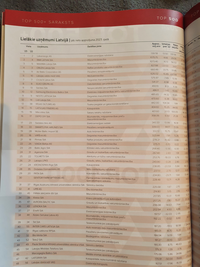

In [14]:
# Resize the image
new_size = (267, 200)  # (width, height)
resized_image = image.resize(new_size, Image.LANCZOS)

# Display the resized image
display(resized_image.transpose(Image.ROTATE_270))

In [15]:
# Convert rotated image back to bytes
buffer = BytesIO()
rotated_image.save(buffer, format="JPEG")  # Change format if needed (PNG, etc.)
rotated_image_data = buffer.getvalue()

# Encode to base64
base64_rotated_image = base64.b64encode(rotated_image_data).decode('utf-8')

In [16]:
ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{base64_rotated_image}" 
    },
    include_image_base64=True
)

Get image* bounding box dimensions.\
*Mistral OCR did not extract all data from the image - it extracted the title, but all other data it leaves as an image.

In [18]:
i = ocr_response.pages[0].images[0]

In [19]:
# Create a drawing object
draw = ImageDraw.Draw(rotated_image)

# Draw the bounding box
bbox_color = (255, 0, 0)  # Red color
draw.rectangle([(i.top_left_x, i.top_left_y), (i.bottom_right_x, i.bottom_right_y)], outline=bbox_color, width=3)

# Show or save the image
#rotated_image.show()  # Display the image
#display(rotated_image)

In [20]:
cropped_image = rotated_image.crop((0, 0, rotated_image.width, int(rotated_image.height*0.25)))

Bounding box shows witch part of the image is not extracted - in this case basically all image data:

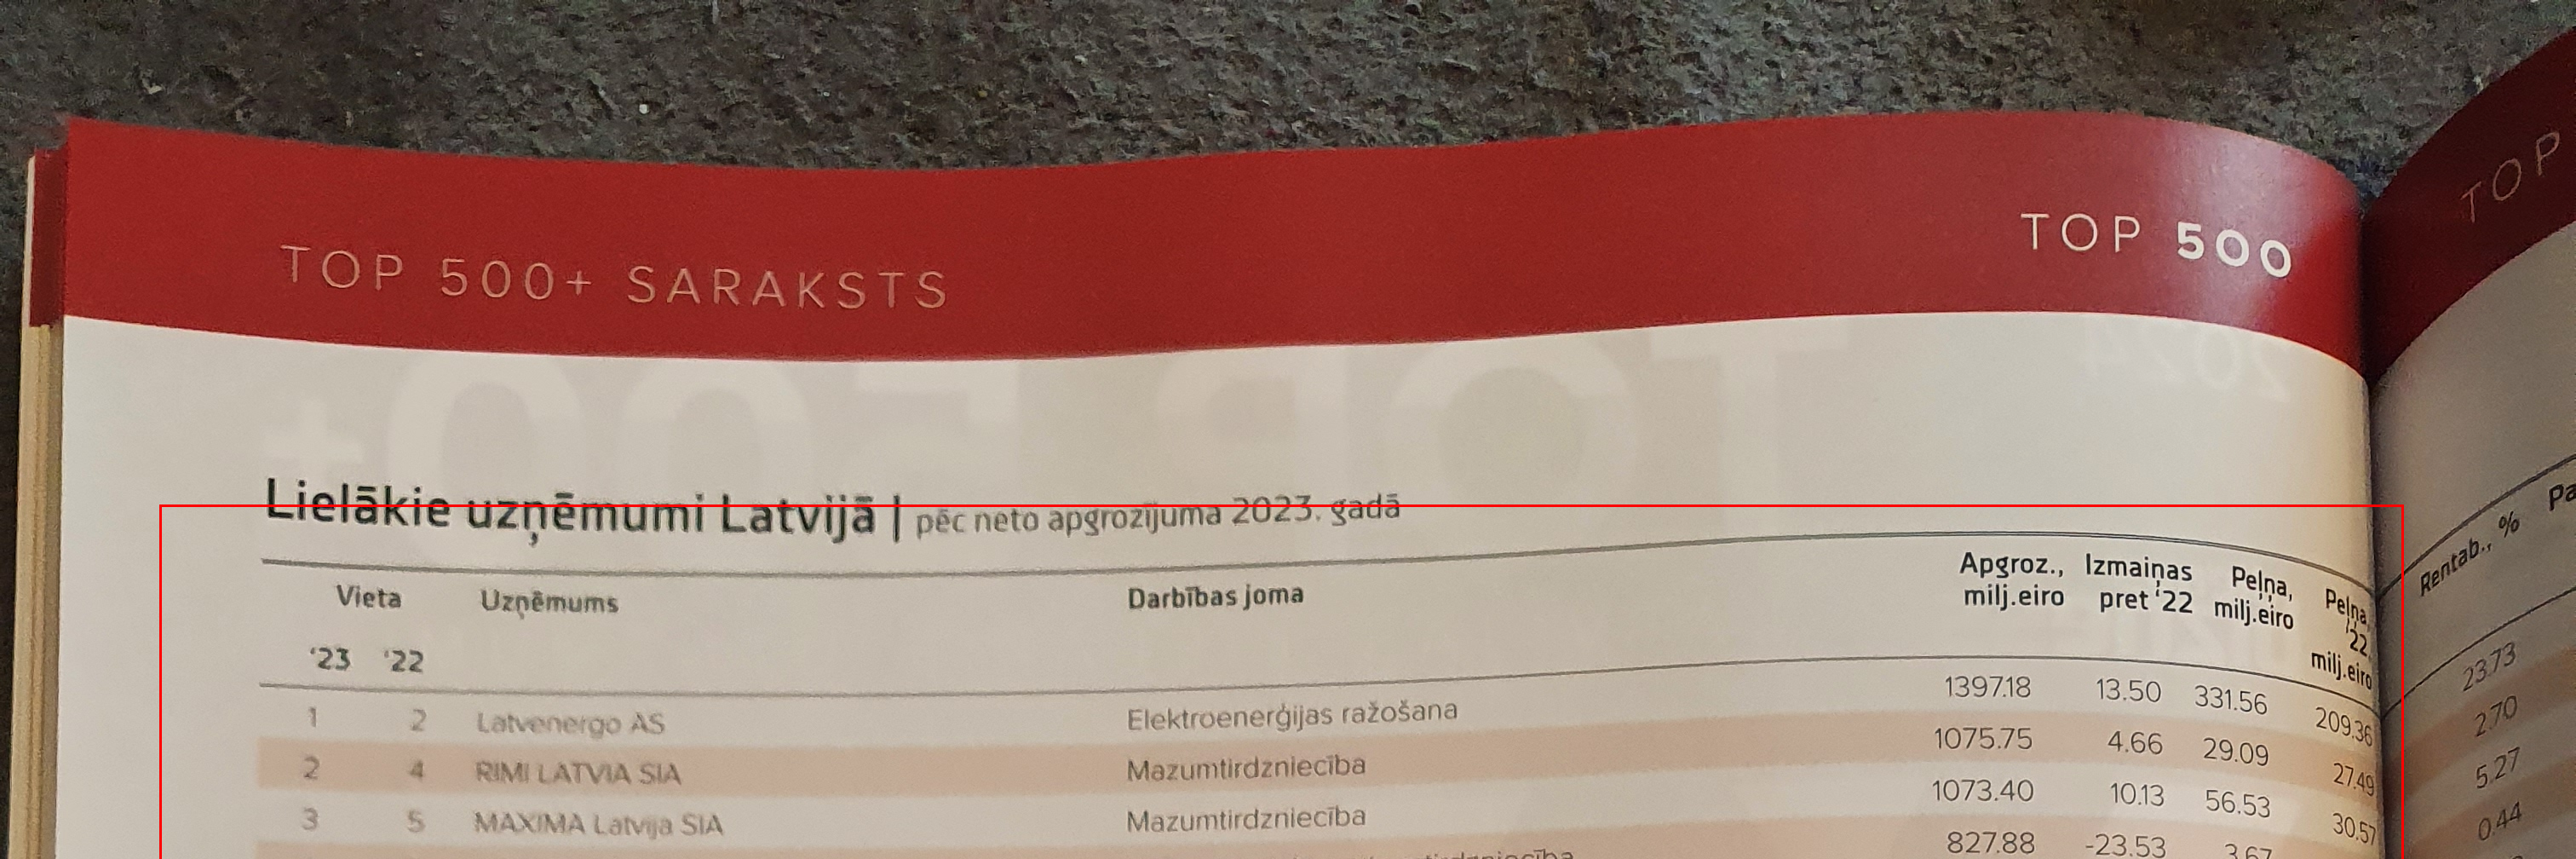

In [21]:
display(cropped_image)

In [22]:
display(Markdown(ocr_response.pages[0].markdown))

Lielākie uzņēmumi Latvijā | pēc neto apgrozījuma 2023. șadā
![img-0.jpeg](img-0.jpeg)

**Image #2**
- source: https://www.sam.gov.lv/lv/informacija-par-darba-samaksu

In [6]:
with open('Atalgojums_amati_012025_.jpg', "rb") as image_file:
    image_data2 = image_file.read()
image2 = Image.open(BytesIO(image_data2))

In [7]:
image2.size

(1754, 2480)

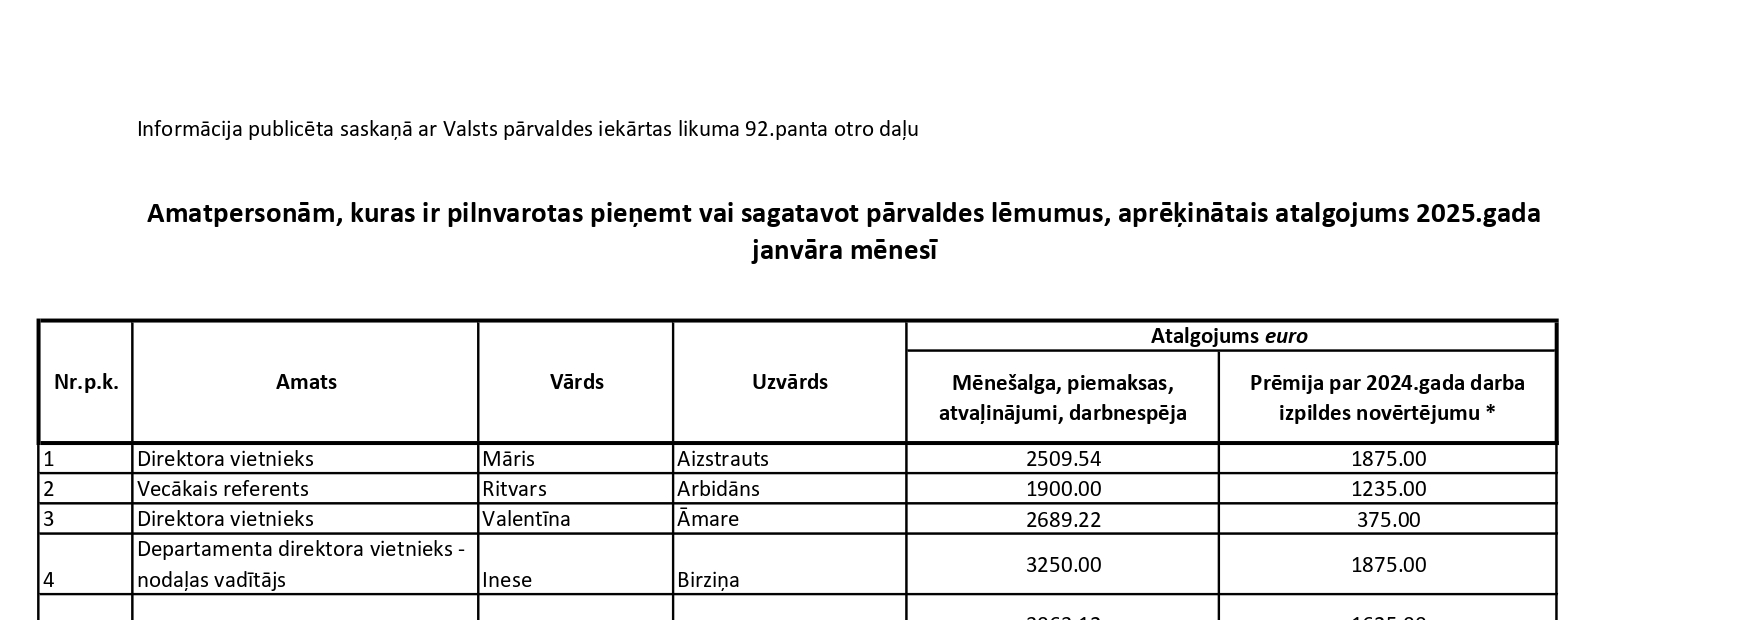

In [8]:
display(image2.crop((0, 0, image2.width, int(image2.height*0.25))))

In [9]:
base64_image2 = base64.b64encode(image_data2).decode('utf-8')

In [10]:
ocr_response2 = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{base64_image2}" 
    }
)

In [11]:
display(Markdown(ocr_response2.pages[0].markdown))

# Amatpersonām, kuras ir pilnvarotas pieņemt vai sagatavot pārvaldes lēmumus, aprēķinātais atalgojums 2025.gada janvāra mēnesī 

| Nr.p.k. | Amats | Vārds | Uzvārds | Atalgojums euro |  |
| :--: | :--: | :--: | :--: | :--: | :--: |
|  |  |  |  | Mēnešalga, piemaksas, atvajinājumi, darbnespēja | Prēmija par 2024.gada darba izpildes novērtējumu * |
| 1 | Direktora vietnieks | Māris | Airstrauts | 2509.54 | 1875.00 |
| 2 | Vecākais referents | Ritvars | Arbidāns | 1900.00 | 1235.00 |
| 3 | Direktora vietnieks | Valentīna | Āmare | 2689.22 | 375.00 |
| 4 | Departamenta direktora vietnieks - nodaḷas vadītājs | Inese | Birzina | 3250.00 | 1875.00 |
| 5 | Departamenta direktora vietnieks | Jānis | Kalninš | 3063.12 | 1625.00 |
| 6 | Departamenta direktors | Artūrs | Kokars | 4068.51 | 2400.00 |
| 7 | Departamenta direktora vietnieks - nodaḷas vadītājs | Andžela | Korotkoručko | 3510.27 | 2016.00 |
| 8 | Vecākais referents | Marina | Kurpniece | 1937.98 | 1235.00 |
| 9 | Departamenta direktora vietnieks | Signe | Kauklte | 3250.00 | 1875.00 |
| 10 | Nodaḷas vadītājs | Vātors | U̇penits | 3250.00 | 1875.00 |
| 11 | Departamenta direktors | Elīna | Luca | 3200.00 | 2080.00 |
| 12 | Direktora vietnieks - nodaḷas vadītājs | Jana | Lūsvere | 3000.00 | 1875.00 |
| 13 | Departamenta direktora vietnieks - nodaḷas vadītājs | Andris | Maldups | 2756.21 | 2100.00 |
| 14 | Valsts sekretāra vietnieks | Kristīne | Malnača | 6500.00 | 2150.00 |
| 15 | Departamenta direktors | Patriks | Markēvičs | 3472.72 | 2080.00 |
| 16 | Departamenta direktors | Annija | Novikova | 4099.49 | 2400.00 |
| 17 | Departamenta direktora vietnieks - nodaḷas vadītājs | Dana | Osmane | 2977.27 | 1875.00 |
| 18 | Vecākais referents | Juris | Pakalns | 1893.91 | 1235.00 |
| 19 | Departamenta direktora vietnieks | Oskars | Podnieks | 2977.27 | 1875.00 |
| 20 | Nodaḷas vadītājs | Vilnis | Preimanis | 3494.40 | 2016.00 |
| 21 | Departamenta direktors | Liene | Priedīte - Kancēviča | 4160.00 | 2400.00 |
| 22 | Departamenta direktors | Linda | Pūce | 2945.46 | 2400.00 |
| 23 | Departamenta direktors | Anita | Rozenberga | 3400.00 | 1054.00 |
| 24 | Departamenta vecākais referents | Elīna | Saule | 1958.70 | 1235.00 |
| 25 | Departamenta direktors | Gatis | Silovs | 4550.00 | 840.00 |
| 26 | Valsts sekretāra vietnieks | Inguna | Strautmane | 4628.49 | 3825.00 |
| 27 | Departamenta direktors | Andis | Strods | 4355.00 | 2512.50 |
| 28 | Departamenta direktora vietnieks - nodaḷas vadītājs | Baiba | Šadurska | 3176.60 | 950.00 |
| 29 | Valsts sekretāra vietnieks | Elīna | Šimina - Neverowska | 6110.00 | 3525.00 |
| 30 | Departamenta direktora vietnieks - nodaḷas vadītājs | Māra | Tapina | 4561.58 | 0.00 |
| 31 | Departamenta direktors | Iveta | Turauska | 3810.91 | 2400.00 |
| 32 | Iepirkumu komisijas loceklis | Aija | Vecenāne | 2803.68 | 1619.25 |
| 33 | Departamenta direktors | Tālivaldis | Vectīrāns | 4160.00 | 2400.00 |
| 34 | Departamenta vecākais referents | Ruta | Veidīna | 2280.00 | 1425.00 |
| 35 | Iepirkumu komisijas loceklis | Indra | Vilde | 2470.00 | 1425.00 |
| 36 | Departamenta direktors | Baiba | Vīlipa | 4160.00 | 2400.00 |
| 37 | Departamenta direktora vietnieks - nodaḷas vadītājs | Agnese | Zarina | 3250.00 | 1875.00 |
| 38 | Valsts sekretārs | Andulis | Židkovs | 6346.00 | 0.00 |

[^0]
[^0]:    * Saskaņā ar Valsts un pašvaldību institūciju amatpersonu un darbinieku atlidzības likuma 16.panta otro daļu

**Conclusion**\
Correctness by columns:
- _Position_ (Amats) - 97.4%
- _Name_ (Vārds) - 97.4%
- _Surname_ (Uzvārds) - 73.7%
- _Monthly salary, bonuses, sick leave, incapacity for work_ (Mēnešalga, piemaksas, atvajinājumi, darbnespēja) - 100%
- _Bonus for 2024 performance evaluation_ (Prēmija par 2024.gada darba izpildes novērtējumu) - 97.4%
- **Total: 93.2%**

You can ask to structure this information into JSON format:

In [13]:
# Get structured response from model
chat_response = client.chat.complete(
    model="pixtral-12b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": f"data:image/jpeg;base64,{base64_image2}"
                },
                {
                    "type": "text",
                    "text": f"This is image's OCR in markdown:\n\n{ocr_response2.pages[0].markdown}\n.\n"
                            "Convert this into a sensible structured json response. "
                            "The output should be strictly be json with no extra commentary"
                },
                ],
        }
    ],
    response_format={"type": "json_object"},
    temperature=0,
)

# Parse and return JSON response
response_dict = json.loads(chat_response.choices[0].message.content)

In [20]:
#print(json.dumps(response_dict, indent=4, ensure_ascii=False))

## Using Pixtral model

**Image #1**


In [ ]:
# Define the messages for the chat
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Transcribe this image"
            },
            {
                "type": "image_url",
                "image_url": f"data:image/jpeg;base64,{base64_rotated_image}" 
            }
        ]
    }
]

In [73]:
# Get the chat response
chat_response = client.chat.complete(
    model="pixtral-12b-2409", # https://docs.mistral.ai/getting-started/models/models_overview/
    messages=messages
)

In [102]:
# Print the content of the response
display(Markdown(chat_response.choices[0].message.content))

The image is a page from a publication listing the top 500+ companies in Latvia for the year 2023. The page is titled "Lielākie uzņēmumi Latvijā | pēc netto apgriezuma 2023. gada," which translates to "Largest Companies in Latvia | by Net Turnover 2023."

The table includes the following columns:
1. **Vieta** (Position)
2. **Uzņēmums** (Company)
3. **Darba vieta** (Number of Employees)
4. **Apgriez., mln. €** (Turnover, million €)
5. **Izmaiņas, mln. €** (Changes, million €)
6. **Prieks, mln. €** (Profit, million €)

Here is a summary of the top companies listed:

1. **Latvenergo AS**
   - Turnover: 1075.75 million €
   - Employees: 2322
   - Profit: 260.19 million €

2. **RIME LATVIA SIA**
   - Turnover: 1073.40 million €
   - Employees: 1011
   - Profit: 76.43 million €

3. **MAXIMA Latvia SIA**
   - Turnover: 827.88 million €
   - Employees: 2353
   - Profit: 34.64 million €

4. **ORLEN Latvija SIA**
   - Turnover: 669.49 million €
   - Employees: 3375
   - Profit: 33.85 million €

5. **AB Baltic Corporation AS**
   - Turnover: 626.02 million €
   - Employees: 3049
   - Profit: 42.04 million €

6. **Latvijas valsts meži VAS**
   - Turnover: 575.97 million €
   - Employees: 749
   - Profit: 13.16 million €

7. **Circle K Latvia SIA**
   - Turnover: 541.37 million €
   - Employees: 898
   - Profit: 5.58 million €

8. **ELKO GP LATVIA AS**
   - Turnover: 493.15 million €
   - Employees: 8.51
   - Profit: 11.39 million €

9. **Santeh SIA**
   - Turnover: 486.11 million €
   - Employees: 142
   - Profit: 10.64 million €

10. **Samsung Electronics Baltics SIA**
    - Turnover: 485.65 million €
    - Employees: 14.32
    - Profit: 10.65 million €

The list continues with other companies, each with their respective turnover, number of employees, and profit figures. The companies span various industries, including energy, retail, manufacturing, and more.

In [101]:
chat_response.usage

UsageInfo(prompt_tokens=3143, completion_tokens=715, total_tokens=3858)

**Conclusion**: `pixtral-12b-2409` returned wrong result.

**Image #2**

In [ ]:
# Define the messages for the chat
messages_img2 = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "Transcribe this image. Image text is in Latvian." # In the first try it transcribed in Lithuanian, therefore I added text: "Image text is in Latvian"
            },
            {
                "type": "image_url",
                "image_url": f"data:image/jpeg;base64,{base64_image2}" 
            }
        ]
    }
]

In [48]:
# Get the chat response
chat_response_img2 = client.chat.complete(
    model="pixtral-12b-2409", # https://docs.mistral.ai/getting-started/models/models_overview/
    messages=messages_img2
)

In [53]:
chat_response_img2.usage

UsageInfo(prompt_tokens=3023, completion_tokens=1884, total_tokens=4907)

In [49]:
# Print the content of the response
display(Markdown(chat_response_img2.choices[0].message.content))

# Informācija publikai saskana ar Valsts parvaldes iekārtas likumu 92.panta otrajā daļā

## Amatpersonām, kuras ir pilnvarotas pienemt vai sagatavot pārvaldes lēmumus, aprēķinātājus atalojumus 2025.gada janvāra mēnesī

| Nr. p.k. | Amats                | Vārds   | Uzvārds       | Mēnešsalen, pienākumu atvalinājumā, derīgošāja | Priekšija 2024.gada darba izliedes novērtējumu * |
|---------|----------------------|---------|---------------|-----------------------------------------------|---------------------------------------------|
| 1       | Direktors vietnieks  | Māris   | Austraus      | 2500.54                                      | 1875.00                                    |
| 2       | Veselības referents  | Ivars   | Arbidans      | 1900.00                                       | 1235.00                                    |
| 3       | Direktors vietnieks  | Valērijs| Amare        | 2689.22                                       | 375.00                                     |
| 4       | Departamenta direktors vietnieks (nodala) | Aivars | Jurkāns      | 3250.00                                      | 1875.00                                    |
| 5       | Departamenta direktors (nodala) | Jānis   | Kalniņš      | 3065.12                                      | 1625.00                                    |
| 6       | Departamenta direktors | Artūrs  | Kokars        | 4068.51                                       | 2400.00                                    |
| 7       | Departamenta direktors (nodala) | Andris  | Koris         | 3510.27                                       | 2016.00                                    |
| 8       | Veselības referents  | Mārtiņš | Kurpnieks     | 1917.98                                       | 1235.00                                    |
| 9       | Departamenta direktors vietnieks | Aivars  | Jurkāns       | 3250.00                                      | 1875.00                                    |
| 10      | Direktors            | Uldis   | Lapiņš        | 3150.00                                       | 1875.00                                    |
| 11      | Departamenta direktors | Uldis   | Lapiņš        | 3200.00                                       | 2080.00                                    |
| 12      | Direktors vietnieks - nodala | Jānis   | Kalniņš      | 3000.00                                      | 1875.00                                    |
| 13      | Departamenta direktors (nodala) | Andris  | Maldups      | 2756.23                                       | 2100.00                                    |
| 14      | Valsts sekretārs vietnieks | Kristīne | Malinauskā   | 6500.00                                      | 2150.00                                    |
| 15      | Departamenta direktors | Patris  | Markvīds      | 3472.72                                       | 2080.00                                    |
| 16      | Departamenta direktors | Atnājs  | Moviļovs      | 4099.49                                       | 2400.00                                    |
| 17      | Nodala vadītājs       | Dāvis   | Ozoliņš       | 2977.27                                       | 1875.00                                    |
| 18      | Veselības referents  | Juris   | Pakalns       | 1893.91                                       | 1235.00                                    |
| 19      | Departamenta direktors (nodala) | Oskars  | Podnieks      | 2977.27                                       | 1875.00                                    |
| 20      | Nodala vadītājs       | Kaspars | Priede        | 3490.40                                       | 2016.00                                    |
| 21      | Departamenta direktors | Liene   | Priede - Kanceviča | 4160.00                                      | 2400.00                                    |
| 22      | Departamenta direktors | Līga    | Priede        | 2943.46                                       | 2400.00                                    |
| 23      | Departamenta direktors | Andris  | Rozenbergs    | 3450.00                                       | 1054.00                                    |
| 24      | Departamenta veselības referents | Elīna  | Saule        | 1950.70                                       | 1235.00                                    |
| 25      | Departamenta direktors | Gatis   | Slokis       | 4550.00                                       | 840.00                                     |
| 26      | Valsts sekretārs vietnieks | Jānis   | Strupulis     | 4648.49                                       | 3825.00                                    |
| 27      | Departamenta direktors | Aivars  | Jurkāns       | 3250.00                                      | 2512.50                                    |
| 28      | Nodala vadītājs       | Baiba   | Seduņa        | 3176.60                                       | 990.00                                     |
| 29      | Valsts sekretārs vietnieks | Elīna  | Šimina - Neverovska | 6110.00                                      | 3525.00                                    |
| 30      | Nodala vadītājs       | Māris   | Lapina        | 4561.58                                       | 0.00                                       |
| 31      | Departamenta direktors | Iveta   | Turaudska     | 3810.91                                       | 2400.00                                    |
| 32      | Ipakalpojumu kontrolējušo iestāžu direktors | Aija  | Vecernieks    | 2801.68                                       | 1619.25                                    |
| 33      | Departamenta direktors | Valērijs| Valainis      | 4160.00                                      | 2400.00                                    |
| 34      | Departamenta veselības referents | Rūta    | Veidina       | 2280.00                                      | 1425.00                                    |
| 35      | Ipakalpojumu kontrolējušo iestāžu direktors | Indra  | Vīde          | 2470.00                                      | 1425.00                                    |
| 36      | Departamenta direktors | Baiba   | Zīle          | 4160.00                                      | 2400.00                                    |
| 37      | Nodala vadītājs       | Aigars  | Zariņš        | 3250.00                                      | 1875.00                                    |
| 38      | Valsts sekretārs      | Andris  | Ziedonis      | 6348.00                                      | 0.00                                       |

* Saskaitot ar Valsts un pašvaldību institūciju amatpersonu un darbinieku atļotā likuma 16.panta otro daļu.

**Conclusion**\
Correctness by columns using `pixtral-12b-2409` model (in the parentheses Mistral OCR result):
- _Position_ (Amats) - 34.2% (97.4%)
- _Name_ (Vārds) - 42.1% (97.4%)
- _Surname_ (Uzvārds) - 15.8% (73.7%)
- _Monthly salary, bonuses, sick leave, incapacity for work_ (Mēnešalga, piemaksas, atvajinājumi, darbnespēja) - 65.8% (100%)
- _Bonus for 2024 performance evaluation_ (Prēmija par 2024.gada darba izpildes novērtējumu) - 94.7% (97.4%)
- **Total: 50.5% (93.2%)**

In [52]:
# Get the chat response - Pixtral Large
chat_response_large = client.chat.complete(
    model="pixtral-large-latest", # https://docs.mistral.ai/getting-started/models/models_overview/
    messages=messages_img2)

In [54]:
chat_response_large.usage

UsageInfo(prompt_tokens=3025, completion_tokens=1980, total_tokens=5005)

In [21]:
#chat_response_large.choices[0].message.content

In [57]:
# Print the content of the response
display(Markdown(chat_response_large.choices[0].message.content))

Certainly! Here is the transcribed text from the image:

---

Informācija publicēta saskaņā ar Valsts pārvaldes iekrātās ietekmes likuma 92.panta otrā daļa

**Amatpersonām, kurām ir plīnarotas pieņemot vai sagādātavot pārvaldes lēmumus, aprēķinātās atalgojums 2025.gada janvāra mēnesī**

| Nr.p.k. | Amats | Vārds | Uzvārds | Atalgojums euro |
|--------|-------|-------|---------|------------------|
|        |       |       |         | Mēneša līdz pieņemšanas, |
|        |       |       |         | atvainošanai, darbenepeja | Prēmija par 2024.gada darba |
|        |       |       |         |                  | izpildes novērtējumu * |
| 1      | Direktora vietnieks | Māris | Aizstrauts | 2508,54 | 1875,00 |
| 2      | Veikalā referents | Rivars | Arbidāns | 1900,00 | 1235,00 |
| 3      | Direktora vietnieks | Valentīna | Amane | 2689,22 | 375,00 |
| 4      | Departamenta direktora vietnieks | Aivars | Birznieks | 3250,00 | 1875,00 |
| 5      | Departamenta direktora vietnieks | Ilmars | Kalniņš | 3683,12 | 1625,00 |
| 6      | Departamenta direktors | Artūrs | Kokars | 4068,51 | 2400,00 |
| 7      | Departamenta direktora vietnieks | Andris | Korokovs'ko | 3510,27 | 2016,00 |
| 8      | Veikalā referents | Marina | Kurpniece | 1937,98 | 1235,00 |
| 9      | Departamenta direktora vietnieks | Gints | Ķauķītis | 3250,00 | 1875,00 |
| 10     | Departamenta direktors | Gints | Ļebedevs | 3194,00 | 1875,00 |
| 11     | Departamenta direktors | Rihards | Mele | 3200,00 | 2080,00 |
| 12     | Direktora vietnieks - nodaļas vadītājs | Jānis | Lūsvere | 3000,00 | 1875,00 |
| 13     | Departamenta direktora vietnieks | Andris | Makidūns | 2756,21 | 2100,00 |
| 14     | Valsts sekretāra vietnieks | Kristīne | Malināca | 6500,00 | 2150,00 |
| 15     | Departamenta direktors | Patriks | Markēvičs | 3472,72 | 2080,00 |
| 16     | Departamenta direktors | Ainija | Movilova | 4098,49 | 2400,00 |
| 17     | Departamenta direktora vietnieks | Tālis | Odriņš | 2977,27 | 1875,00 |
| 18     | Veikalā referents | Juris | Pakalns | 1891,91 | 1235,00 |
| 19     | Departamenta direktora vietnieks | Jānis | Podnieks | 2977,27 | 1875,00 |
| 20     | Nodaļas vadītājs | Gatis | Raķis | 3494,40 | 2016,00 |
| 21     | Departamenta direktors | Iļena | Priekšte - Kanceviča | 4160,00 | 2400,00 |
| 22     | Departamenta direktors | Linda | Price | 2945,46 | 2400,00 |
| 23     | Departamenta direktors | Raita | Rozemberga | 3400,00 | 1034,00 |
| 24     | Departamenta veselības referents | Ilona | Saulīte | 1958,70 | 1235,00 |
| 25     | Departamenta direktors | Gatis | Sīlova | 4550,00 | 840,00 |
| 26     | Valsts sekretāra vietnieks | Ingūna | Strautiņa | 4628,49 | 3525,00 |
| 27     | Departamenta direktora vietnieks | Anda | Sute | 3339,50 | 2312,50 |
| 28     | Departamenta direktora vietnieks | Dalibor | Šadurska | 3174,60 | 990,00 |
| 29     | Valsts sekretāra vietnieks | Līna | Šimisa - Neverovska | 6110,00 | 3525,00 |
| 30     | Departamenta direktora vietnieks | Māra | Tapina | 4561,58 | 0,00 |
| 31     | Departamenta direktors | Iventa | Turauska | 3810,51 | 2400,00 |
| 32     | Iepirkumu kontijas speciālists | Aija | Vecmane | 2807,68 | 1619,25 |
| 33     | Departamenta direktors | Edvards | Vecumnieks | 3160,00 | 1460,00 |
| 34     | Departamenta veselības referents | Ruta | Vedriņa | 2280,00 | 1425,00 |
| 35     | Iepirkumu kontijas speciālists | Indra | Vītola | 2470,00 | 1425,00 |
| 36     | Departamenta direktora vietnieks | Baiba | Zariņa | 4160,00 | 2400,00 |
| 37     | Departamenta direktora vietnieks | Agnese | Zariņa | 3250,00 | 1875,00 |
| 38     | Valsts sekretārs | Andulis | Žadkovs | 6340,00 | 0,00 |

* Saskaņā ar Valsts un pašvaldību institūciju amatpersonu un darbinieku atlīdzību likuma 16.panta otrā daļa

**Conclusion**\
Correctness by columns using `pixtral-large-latest` model (in the parentheses Mistral OCR result):
- _Position_ (Amats) - 52.6% (97.4%)
- _Name_ (Vārds) - 44.7% (97.4%)
- _Surname_ (Uzvārds) - 31.6% (73.7%)
- _Monthly salary, bonuses, sick leave, incapacity for work_ (Mēnešalga, piemaksas, atvajinājumi, darbnespēja) - 71.8% (100%)
- _Bonus for 2024 performance evaluation_ (Prēmija par 2024.gada darba izpildes novērtējumu) - 89.5% (97.4%)
- **Total: 57.9% (93.2%)**

In [84]:
Markdown(f"Using `pixtral-large-latest` this prompt cost me **0.01614 EUR** (input tokens: {chat_response_large.usage.prompt_tokens}, output tokens: {chat_response_large.usage.completion_tokens}).")

Using `pixtral-large-latest` this prompt cost me **0.01614 EUR** (input tokens: 3025, output tokens: 1980).

## Document understanding
- See also: https://docs.mistral.ai/capabilities/document/#document-understanding

In [65]:
# Define the messages for the chat
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "text",
                "text": "How did women's haircut prices change in December (XII) compared to October (X)?"
            },
            {
                "type": "document_url",
                "document_url": "https://admin.stat.gov.lv/system/files/publication/2025-01/Nr_14_Paterina_cenas_2024_04_%282024_04q%29_LV_EN.pdf"
            }
        ]
    }
]

In [66]:
# Get the chat response
chat_response = client.chat.complete(
    model="mistral-large-latest",
    messages=messages
)

In [67]:
chat_response.usage

UsageInfo(prompt_tokens=7429, completion_tokens=278, total_tokens=7707)

In [107]:
# Print the content of the response
display(Markdown(chat_response.choices[0].message.content))

To determine how women's haircut prices changed in December (XII) compared to October (X), we need to look at the specific data provided for women's haircut prices in the document.

The relevant data is:
- October (X): 28.73 euros
- December (XII): 29.07 euros

To find the percentage change, we use the formula:
\[ \text{Percentage Change} = \left( \frac{\text{New Price} - \text{Old Price}}{\text{Old Price}} \right) \times 100 \]

Plugging in the values:
\[ \text{Percentage Change} = \left( \frac{29.07 - 28.73}{28.73} \right) \times 100 \]

\[ \text{Percentage Change} = \left( \frac{0.34}{28.73} \right) \times 100 \]

\[ \text{Percentage Change} \approx 1.1834\% \]

So, women's haircut prices increased by approximately 1.18% in December (XII) compared to October (X).

In [83]:
Markdown(f"Using `mistral-large-latest` this prompt cost me **0.01487 EUR** (input tokens: {chat_response.usage.prompt_tokens}, output tokens: {chat_response.usage.completion_tokens}).")

Using `mistral-large-latest` this prompt cost me **0.01487 EUR** (input tokens: 7429, output tokens: 278).

## Batch OCR
- See also: https://colab.research.google.com/github/mistralai/cookbook/blob/main/mistral/ocr/batch_ocr.ipynb
- In this example I'm using pictures published [here](https://pietiek.com/raksti/kpv_lv_papira_biedru_skaits_pieaudzis_lidz_663_pietiek_sak_partiju_biedru_sarakstu_publicesanu).

In [130]:
list_image_urls = [f"https://www.pietiek.co/files/01052019_kpv_1/lg/kpv_1_Page_{num:02d}.jpg" for num in range(2, 27)]
len(list_image_urls)

25

Download the image using `requests` and convert it to Base64 using the `base64` module.

In [125]:
list_image_base64 = []
for link in list_image_urls:
    response = requests.get(link)
    if response.status_code == 200:
        img_data = response.content
        
        # Encode the image data to base64 and add the url to the list
        base64_str = base64.b64encode(img_data).decode('utf-8')
        image_url = f"data:image/jpeg;base64,{base64_str}"
        list_image_base64.append(image_url)
len(list_image_base64)

25

Create a batch file:

In [132]:
with open("batch_file.jsonl", 'w') as file:
    for index, img in enumerate(list_image_base64):
        entry = {
            "custom_id": str(index),
            "body": {
                "document": {
                    "type": "image_url",
                    "image_url": img
                            },
                "include_image_base64": True
                }
            }
        file.write(json.dumps(entry) + '\n')

Upload the batch file:

In [133]:
batch_data = client.files.upload(
    file={
        "file_name": "batch_file.jsonl",
        "content": open("batch_file.jsonl", "rb")},
    purpose = "batch"
)

Initiate batch inference:

In [134]:
created_job = client.batch.jobs.create(
    input_files=[batch_data.id],
    model="mistral-ocr-latest",
    endpoint="/v1/ocr",
    metadata={"job_type": "testing_batch_ocr"}
)

d:\Veiktie_darbi\202412_AI_Agent_Recruiting\.env\Lib\site-packages\pydantic\_internal\_core_utils.py:448: ResourceWarning: unclosed file <_io.FileIO name='batch_file.jsonl' mode='rb' closefd=True>
  def collect_refs(s: core_schema.CoreSchema, recurse: Recurse) -> core_schema.CoreSchema:


In [135]:
retrieved_job = client.batch.jobs.get(job_id=created_job.id)
print(f"Status: {retrieved_job.status}")
print(f"Total requests: {retrieved_job.total_requests}")
print(f"Failed requests: {retrieved_job.failed_requests}")
print(f"Successful requests: {retrieved_job.succeeded_requests}")
print(
    f"Percent done: {round((retrieved_job.succeeded_requests + retrieved_job.failed_requests) / retrieved_job.total_requests, 4) * 100}%"
)

Status: SUCCESS
Total requests: 25
Failed requests: 0
Successful requests: 25
Percent done: 100.0%


Get batch result:

In [ ]:
#output = client.files.download(file_id='9572902a-21c6-4a2f-a63d-c725bfbcc231').read().decode('utf-8').strip()

In [141]:
output = client.files.download(file_id=retrieved_job.output_file).read().decode('utf-8').strip()
print(output[:1000])

{"id":"batch-a493ec6b-0-840f05eb-0f9f-4027-be62-84eecd1cfaad","custom_id":"0","response":{"status_code":200,"body":{"pages":[{"index":0,"markdown":"| N.p.k | Uzvārds | Vārds |\n| :--: | :--: | :--: |\n| 1 | Ābollṇa | Sandlja |\n| 2 | Ābollṇa | Anna |\n| 3 | Ahramējevs | Aivis |\n| 4 | Ahunzjanovs | Artūrs |\n| 5 | Alzgrāvis | Armands |\n| 6 | Aizkalne | Anete |\n| 7 | Aizupletis | Gints |\n| 8 | Akerberga | Inta |\n| 9 | Aleksandrovičš | Ludvigs |\n| 10 | Aminjars | Edmonds |\n| 11 | Amoliṇš | Agris Juris |\n| 12 | Ančevskis | Staņislavs |\n| 13 | Andersons | Jānis |\n| 14 | Andersons | Toms |\n| 15 | Apajais | Oskars |\n| 16 | Apine | Margarita |\n| 17 | Arāja | Iveta |\n| 18 | Arājs | Ivo |\n| 19 | Arbidāns | Jānis |\n| 20 | Arhipova | Inesa |\n| 21 | Arkliṇš | Edgars |\n| 22 | Arps | Kaspars |\n| 23 | Asars | Artūrs |\n| 24 | Aščeulovs | Romāns |\n| 25 | Astratovs | Ašots |","images":[],"dimensions":{"dpi":200,"height":960,"width":1361}}],"model":"mistral-ocr-2503-completion","usage

In [8]:
for line in output.split('\n'):
    parsed_line = json.loads(line) # dict_keys(['id', 'custom_id', 'response', 'error'])
    response = parsed_line.get('response', {}) # dict_keys(['status_code', 'body'])
    body = response.get('body', {}) # dict_keys(['pages', 'model', 'usage_info'])
    print(body['pages'][0]['markdown'])

| N.p.k | Uzvārds | Vārds |
| :--: | :--: | :--: |
| 1 | Ābollṇa | Sandlja |
| 2 | Ābollṇa | Anna |
| 3 | Ahramējevs | Aivis |
| 4 | Ahunzjanovs | Artūrs |
| 5 | Alzgrāvis | Armands |
| 6 | Aizkalne | Anete |
| 7 | Aizupletis | Gints |
| 8 | Akerberga | Inta |
| 9 | Aleksandrovičš | Ludvigs |
| 10 | Aminjars | Edmonds |
| 11 | Amoliṇš | Agris Juris |
| 12 | Ančevskis | Staņislavs |
| 13 | Andersons | Jānis |
| 14 | Andersons | Toms |
| 15 | Apajais | Oskars |
| 16 | Apine | Margarita |
| 17 | Arāja | Iveta |
| 18 | Arājs | Ivo |
| 19 | Arbidāns | Jānis |
| 20 | Arhipova | Inesa |
| 21 | Arkliṇš | Edgars |
| 22 | Arps | Kaspars |
| 23 | Asars | Artūrs |
| 24 | Aščeulovs | Romāns |
| 25 | Astratovs | Ašots |
| 26 | Austriņš | Mairis |
| :--: | :--: | :--: |
| 27 | Auziņš | Ivars |
| 28 | Bacāns | Rūdolfs |
| 29 | Baķe | Anta |
| 30 | Baķis | Kristaps |
| 31 | Balalajevs | Dmitrijs |
| 32 | Balčūna | Danute |
| 33 | Balodis | Girts |
| 34 | Balodis | Gintars |
| 35 | Balodis | Kārlis |
| 

### Python and package versions used in this file

In [2]:
from importlib.metadata import version
from IPython.display import Markdown, display # pip install ipython
import sys

packages = ['ipython', 'keyring', 'markitdown', 'mistralai', 'pillow', 'requests']

text = f"Python version: {sys.version}\n\n"
for i in packages:
    text += f"[{i}](https://pypi.org/project/{i}/) version: {version(i)}\n\n"
display(Markdown(text))

Python version: 3.12.4 (tags/v3.12.4:8e8a4ba, Jun  6 2024, 19:30:16) [MSC v.1940 64 bit (AMD64)]

[ipython](https://pypi.org/project/ipython/) version: 8.31.0

[keyring](https://pypi.org/project/keyring/) version: 25.6.0

[markitdown](https://pypi.org/project/markitdown/) version: 0.0.1a3

[mistralai](https://pypi.org/project/mistralai/) version: 1.5.1

[pillow](https://pypi.org/project/pillow/) version: 11.0.0

[requests](https://pypi.org/project/requests/) version: 2.32.3

